# Classifying Iris Species

In [32]:
import pyforest
import mglearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [18]:
print("Keys of isris_dataset: \n{}".format(iris_dataset.keys()))

Keys of isris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [19]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
print("target names: {}".format(iris_dataset['target_names']))

target names: ['setosa' 'versicolor' 'virginica']


In [21]:
print("feature names: \n{}".format(iris_dataset['feature_names']))

feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
print("type of data: {}".format(type(iris_dataset['data'])))

type of data: <class 'numpy.ndarray'>


In [23]:
print("shape of data: {}".format(iris_dataset['data'].shape))

shape of data: (150, 4)


In [24]:
print("first five rows of data:\n{}".format(iris_dataset['data'][:5]))

first five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [25]:
print("type of data: {}".format(type(iris_dataset['data'])))

type of data: <class 'numpy.ndarray'>


In [26]:
print("shape of target: {}".format(iris_dataset['target'].shape))

shape of target: (150,)


In [27]:
print("target : \n{}".format(iris_dataset['target']))

target : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
# to build a machine learning model first we need to split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [29]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

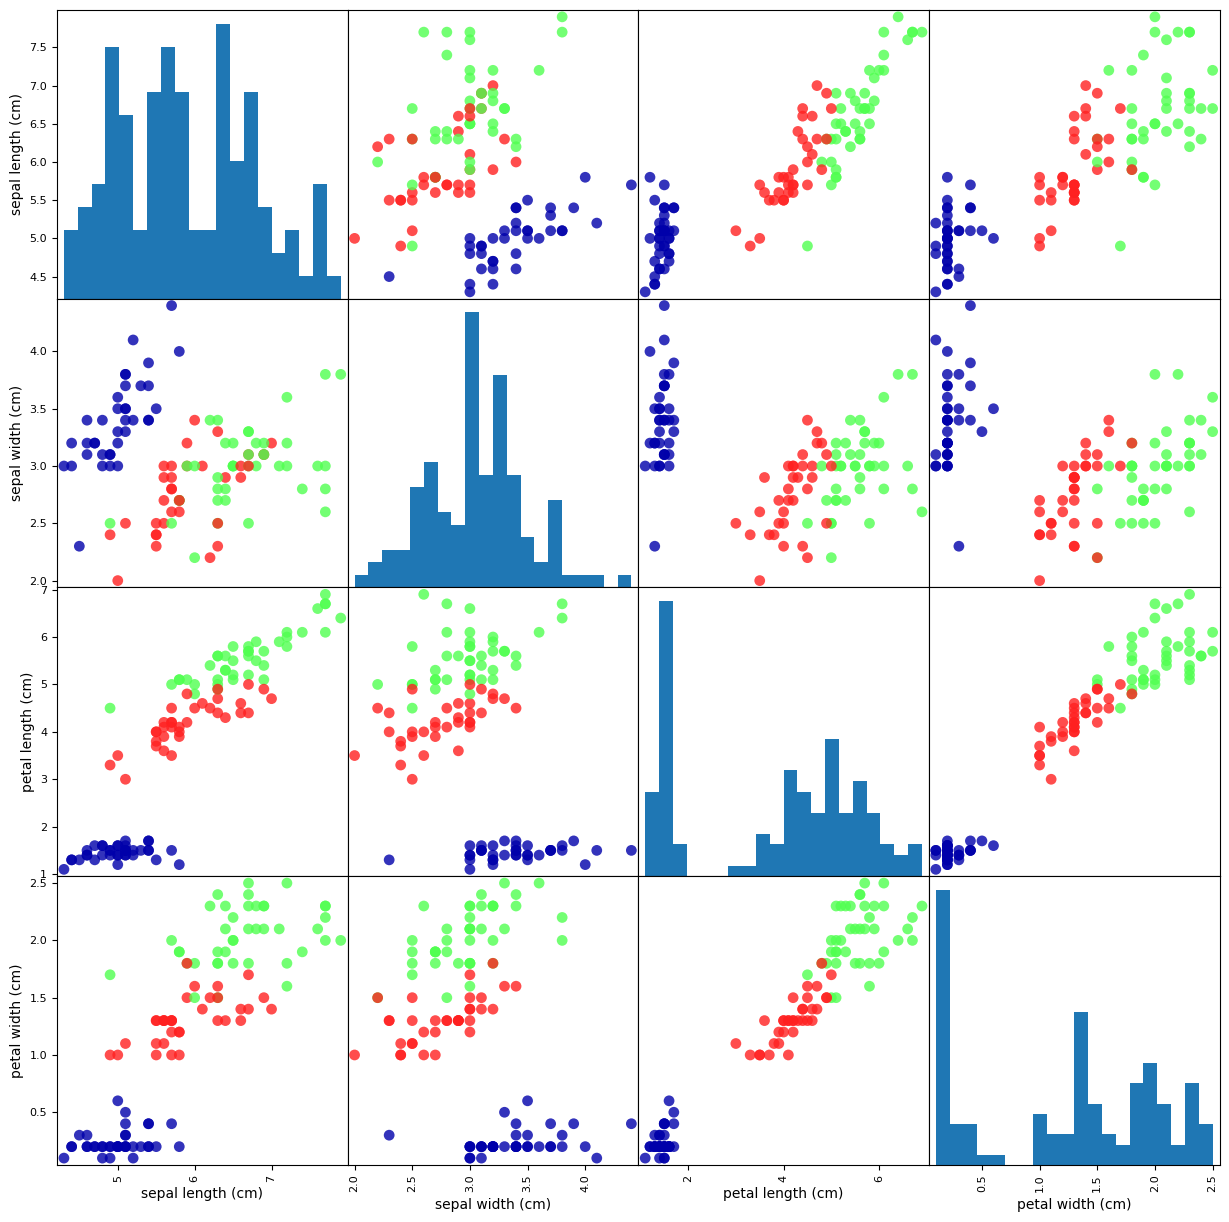

In [39]:
# we will plot the scatter matrix to understand the data better
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [40]:
# buildiong a k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

<IPython.core.display.Javascript object>

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))


Prediction: [0]
Predicted target name: ['setosa']


In [43]:
# our model predicts that this new iris belongs to class 0, meaning its species is setosa.

In [44]:
# evaluating the model
y_pred = knn.predict(X_test)
print("Test set predictions: \n{}".format(y_pred))

Test set predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [45]:
print("test set score: {:.2f}".format(np.mean(y_pred == y_test)))

<IPython.core.display.Javascript object>

test set score: 0.97


In [46]:
# we can also use the score method of the knn object
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [47]:
# for this model, the test accuracy is about 0.97, which means we made the right prediction for 97% of the iris in the test set.

# K-Nearest Neighbors

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

X.shape: (26, 2)


<IPython.core.display.Javascript object>

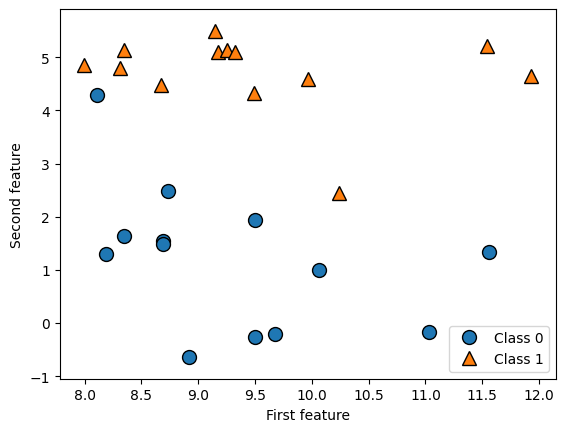

In [48]:
# we will use dataset of make_forge from mglearn
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
plt.show()

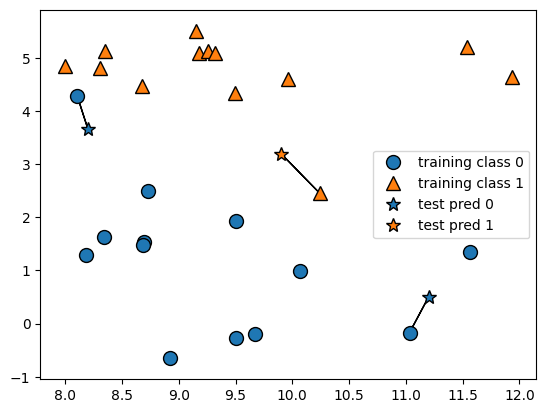

In [49]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

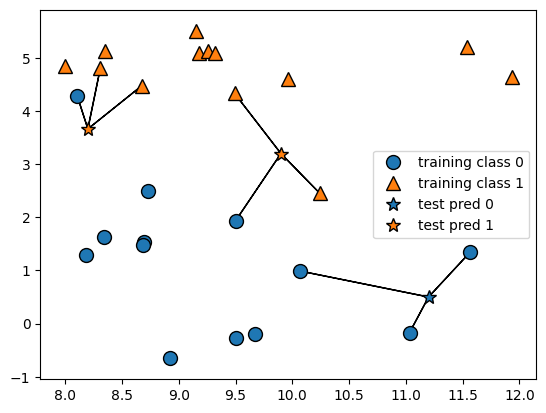

In [50]:
# instead considering only the closest point, we can consider the 3 closest points to classify a new point
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [53]:
# now we will evaluate the model on the test data
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
print("test set prediction : {}".format(clf.predict(X_test)))

test set prediction : [1 0 1 0 1 0 0]


In [61]:
print("test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

test set accuracy: 0.86


In [62]:
# we can see our model is about 0.86 accurate on the test data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

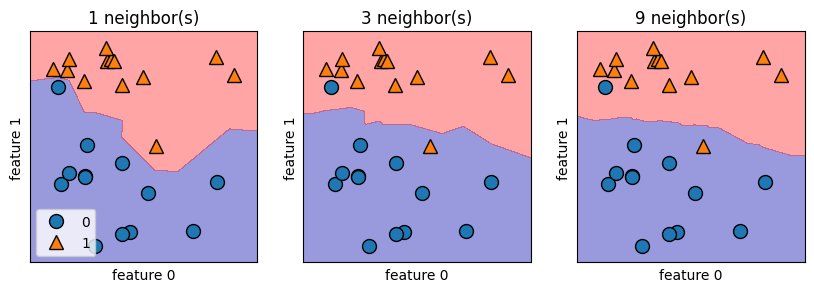

In [63]:
# Analysing the KNeighborsClassifier

fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

here we can see how the decision boundary changes as we change the number of neighbors used in the classification. With 1 neighbor, the decision boundary is very irregular, while with 9 neighbors, it is much smoother.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

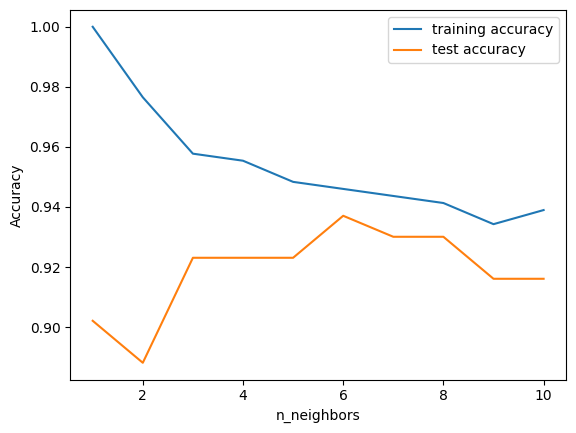

In [ ]:
# now we will evaluate training and test set performance with different number of neighbors
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


we can see that with 1 neighbor the model is overfitting the data and as we increase the number of neighbors the model starts to generalize better. But after a certain point the model starts to underfit the data. So we need to choose the right number of neighbors to get the best performance from our model.

On the other hand, when considering 10 neighbors, the model that is too simple and performance is even worse. The best performance is somewhere in the middle, using around 6 neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

### K-Neighbors regression

there are also regression versions of the k-nearest neighbors algorithm. Instead of predicting the most common class among the neighbors, the regression version predicts the average of the target values of the neighbors.

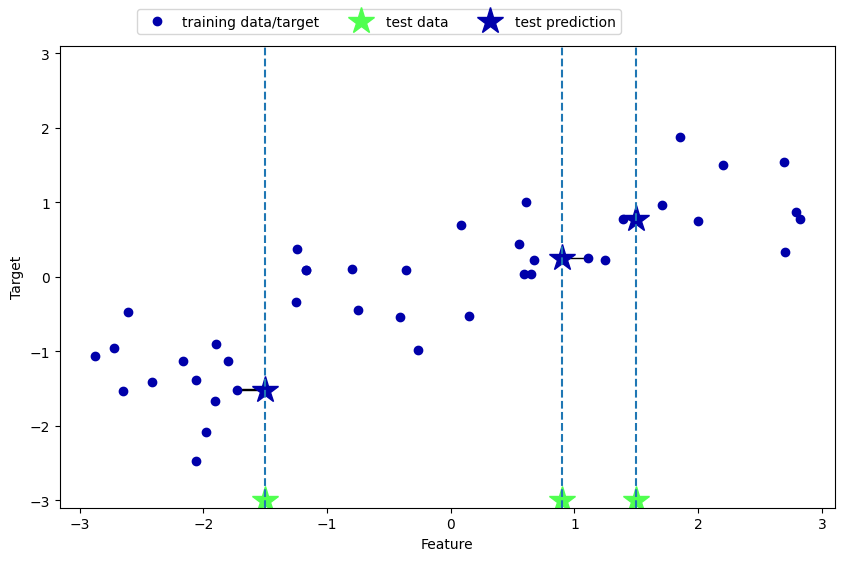

In [65]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

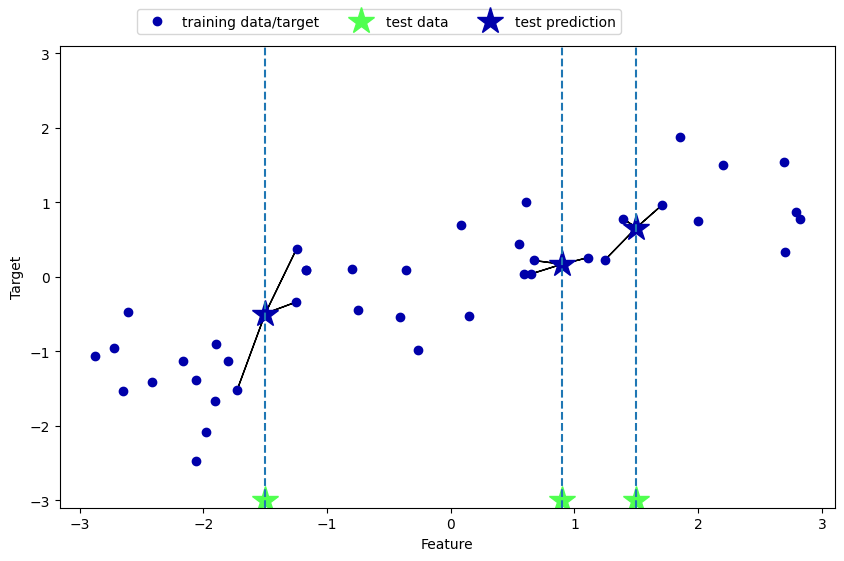

In [66]:
# we will use more than 1 neighbor
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [95]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training target
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [100]:
print("test set prediction: \n{}".format(reg.predict(X_test)))
print("test set true values: \n{}".format(y_test))
print(X_test)
print("Error: {}".format(reg.predict(X_test) - y_test))

test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
test set true values: 
[ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
Error: [-0.42695667  0.13907853  0.16976495 -0.5064205  -0.07901843 -0.72616394
 -0.07969779  0.13344994  0.09434153 -0.18229265]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

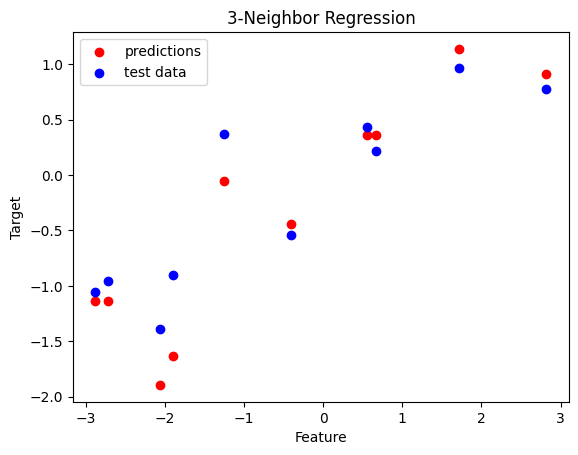

In [97]:
# plot the error model
plt.scatter(X_test, reg.predict(X_test), c='r', label='predictions')
plt.scatter(X_test, y_test, c='b', label='test data')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("3-Neighbor Regression")
plt.legend()
plt.show()

In [98]:
# we can also evaluate the model using the score method
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


In [99]:
# here, the score is about 0.83, meaning our model explains 83% of the variance in the data.

### Analysing KNeighborsRegressor

for our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x_axis, which corresponds t the single feature.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

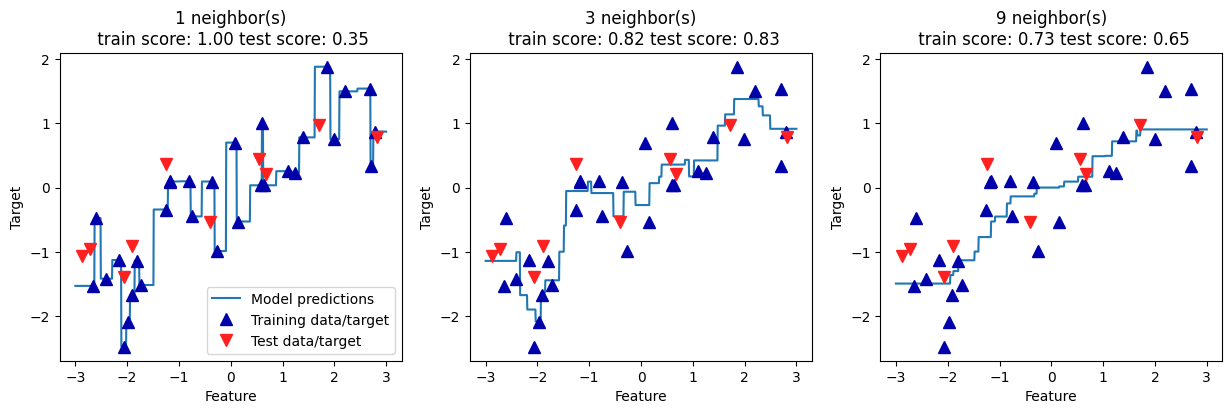

In [101]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()  

as we can see, the model with 1 neighbor perfectly fits the training data, but does not generalize well to the test data. The model with 3 neighbors is a bit less accurate on the training data, but more accurate on the test data. The model with 9 neighbors has even lower accuracy on both training and test data. This is because with more neighbors, the model becomes less flexible and cannot capture the underlying pattern in the data as well.